Apple Stock
=====

### Reference : https://github.com/guipsamora/pandas_exercises/tree/master/09_Time_Series/Apple_Stock

In [1]:
# 1
import pandas as pd

In [2]:
# 2,3 
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

In [3]:
# 4
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [7]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [10]:
# 5
apple['Date'] = pd.to_datetime(apple['Date'], format = '%Y-%M-%d')

In [11]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [12]:
# 6
apple = apple.set_index('Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-01-08 00:07:00,96.27,96.80,93.92,95.35,65130000,95.35
2014-01-07 00:07:00,94.14,95.99,94.10,95.97,56305400,95.97
2014-01-03 00:07:00,93.67,94.10,93.20,94.03,22891800,94.03
2014-01-02 00:07:00,93.87,94.06,93.09,93.48,28420900,93.48
2014-01-01 00:07:00,93.52,94.07,93.13,93.52,38170200,93.52


In [36]:
# 7
# len(apple) == len(apple.groupby('Date').count())
apple.index.is_unique

True

In [37]:
# 8
apple.sort_values(by = 'Date', ascending = True, inplace = True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-01-12 00:12:00,28.75,28.87,28.75,28.75,117258400,0.45
1980-01-15 00:12:00,27.38,27.38,27.25,27.25,43971200,0.42
1980-01-16 00:12:00,25.37,25.37,25.25,25.25,26432000,0.39
1980-01-17 00:12:00,25.87,26.00,25.87,25.87,21610400,0.40
1980-01-18 00:12:00,26.63,26.75,26.63,26.63,18362400,0.41


In [38]:
# 9
# apple.resample('M').sum().reset_index().Date.dt.day
apple_month = apple.resample('BM').mean()

apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-01-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1980-02-29,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-31,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-30,NaN,NaN,NaN,NaN,NaN,NaN
1980-05-30,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# 10
# apple.index[-1] - apple.index[0]
(apple.index.max() - apple.index.min()).days

12437

In [31]:
# 11
len(apple.resample('M'))

409

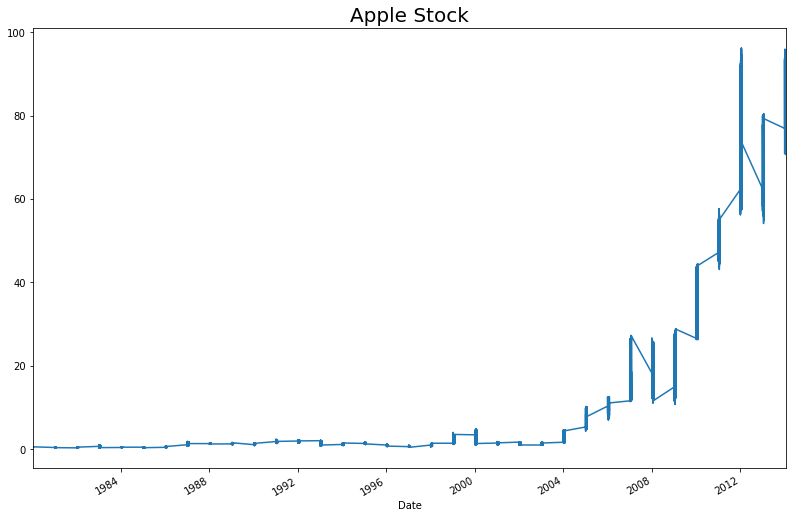

In [47]:
# 12
import matplotlib.pyplot as plt

plt.figure(figsize=(13.5, 9))
plt.title('Apple Stock', fontsize=20)
apple['Adj Close'].plot()